In [7]:
import pandas as pd

In [8]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [9]:
assetDetails = pd.read_csv("g-research-crypto-forecasting/asset_details.csv")

In [18]:
assetDetails.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


In [10]:
train = pd.read_csv("g-research-crypto-forecasting/train.csv")

In [10]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [60]:
train["change"] = train["Open"] - train["Close"]

trainMeans = train.groupby("Asset_ID", as_index=False) \
                  .mean()[["Asset_ID", "Count", "change"]]

In [62]:
trainMeans2 = trainMeans.merge(assetDetails,on="Asset_ID")

In [69]:
trainMeans2

,Asset_ID,Count,change,Weight,Asset_Name
0,0,186.4472019,0.0001079,4.3040651,Binance Coin
1,1,1082.3901212,-0.0003495,6.7799219,Bitcoin
2,2,153.5601353,0.0040191,2.3978953,Bitcoin Cash
3,3,239.3498597,-0.0000001,4.4067192,Cardano
4,4,474.8136586,0.0000001,3.5553481,Dogecoin
5,5,245.5706543,0.0000115,1.3862944,EOS.IO
6,6,689.1085549,-0.0010080,5.8944028,Ethereum
7,7,129.5688635,-0.0000347,2.0794415,Ethereum Classic
8,8,33.4852328,0.0000015,1.0986123,IOTA
9,9,225.6684310,0.0000249,2.3978953,Litecoin


In [ ]:
# train[train["Asset_ID"] == 1] \
#      .plot(x="timestamp", y="open")

In [11]:
train_subset = train[train["Asset_ID"] == 1] \
                    .sort_values("timestamp").head(10000)

<AxesSubplot:xlabel='timestamp'>

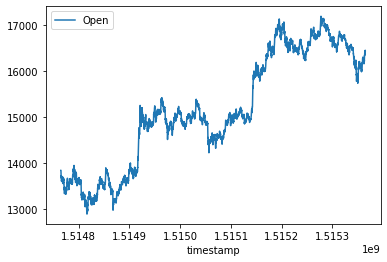

In [13]:
train_subset.plot(x="timestamp", y="Open")

In [15]:
bitcoin = train[train["Asset_ID"] == 1]

<AxesSubplot:xlabel='timestamp'>

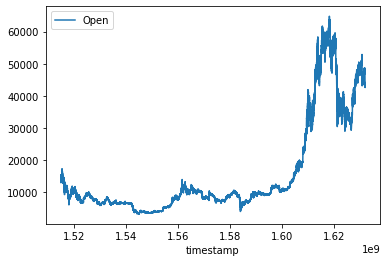

In [16]:
bitcoin.plot(x="timestamp", y="Open")

In [24]:
bitcoin["changePer"] = (bitcoin["Close"] / bitcoin["Open"] - 1) * 100

bitcoin.sort_values("timestamp") \
       .head(100)[["timestamp", "Open", "Close", "changePer"]]

C:\Users\ray\AppData\Local\Temp/ipykernel_11932/229034971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["changePer"] = (bitcoin["Close"] / bitcoin["Open"] - 1) * 100


,timestamp,Open,Close,changePer
2,1514764860,13835.1940000,13850.1760000,0.1082890
10,1514764920,13835.0360000,13828.1020000,-0.0501191
18,1514764980,13823.9000000,13801.3140000,-0.1633837
26,1514765040,13802.5120000,13768.0400000,-0.2497516
34,1514765100,13766.0000000,13724.9140000,-0.2984600
...,...,...,...,...
734,1514770560,13578.4520000,13583.1020000,0.0342454
742,1514770620,13575.4300000,13573.4940000,-0.0142611
750,1514770680,13570.3900000,13576.7240000,0.0466752
758,1514770740,13575.8920000,13566.4320000,-0.0696823
